In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# Airfares Dataset

In [2]:
fileloc = './Airfares.csv'
airfares = pd.read_csv(fileloc) #read the file

### Data Pre-processing

In [3]:
airfares = pd.get_dummies(airfares, columns = ['VACATION', 'SW', 'SLOT', 'GATE'])
airfares= airfares.drop(['S_CODE','S_CITY','E_CODE','E_CITY','VACATION_No', 'SW_No', 'SLOT_Free', 'GATE_Free'], axis = 1) #dropping the first four columns
airfares.head()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,VACATION_Yes,SW_Yes,SLOT_Controlled,GATE_Constrained
0,1.00,3,5291.99,28637.0,21112.0,3036732,205711,312,7864,64.11,0,1,0,0
1,1.06,3,5419.16,26993.0,29838.0,3532657,7145897,576,8820,174.47,0,0,0,0
2,1.06,3,9185.28,30124.0,29838.0,5787293,7145897,364,6452,207.76,0,0,0,0
3,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,85.47,0,1,1,0
4,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,85.47,0,1,0,0


In [4]:
airfares = airfares.rename(columns={'COUPON': 'Layovers','NEW':'New_Carriers','VACATION_Yes':'Vacation',
                                    'SW_Yes':'Southwest','HI':'Market_Concentration','S_INCOME':'StartCity_Income',
                                    'E_INCOME':'EndCity_Income','S_POP':'StartCity_Pop','E_POP':'EndCity_Pop',
                                    'SLOT_Controlled':'Controlled_Airport','GATE_Constrained':'Gate_Constraints',
                                    'DISTANCE':'Distance','PAX':'Passengers','FARE':'Fare' })
airfares.head()

,Layovers,New_Carriers,Market_Concentration,StartCity_Income,EndCity_Income,StartCity_Pop,EndCity_Pop,Distance,Passengers,Fare,Vacation,Southwest,Controlled_Airport,Gate_Constraints
0,1.00,3,5291.99,28637.0,21112.0,3036732,205711,312,7864,64.11,0,1,0,0
1,1.06,3,5419.16,26993.0,29838.0,3532657,7145897,576,8820,174.47,0,0,0,0
2,1.06,3,9185.28,30124.0,29838.0,5787293,7145897,364,6452,207.76,0,0,0,0
3,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,85.47,0,1,1,0
4,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,85.47,0,1,0,0


In [5]:
airfares.isnull().sum()

Layovers                0
New_Carriers            0
Market_Concentration    0
StartCity_Income        0
EndCity_Income          0
StartCity_Pop           0
EndCity_Pop             0
Distance                0
Passengers              0
Fare                    0
Vacation                0
Southwest               0
Controlled_Airport      0
Gate_Constraints        0
dtype: int64

In [6]:
airfaresStd= StandardScaler()
airfaresStd.fit(airfares)
airfaresScaled =airfaresStd.transform(airfares)
columns_names=airfares.columns

In [7]:
airfaresScaled =pd.DataFrame(airfaresScaled,columns=columns_names)
airfaresScaled.head()

,Layovers,New_Carriers,Market_Concentration,StartCity_Income,EndCity_Income,StartCity_Pop,EndCity_Pop,Distance,Passengers,Fare,Vacation,Southwest,Controlled_Airport,Gate_Constraints
0,-0.993492,0.323855,0.493262,0.244098,-1.421905,-0.505305,-1.093410,-1.027748,-0.372821,-1.273869,-0.6027,1.512832,-0.631762,-0.491167
1,-0.698884,0.323855,0.567073,-0.213409,0.471877,-0.340470,1.445565,-0.618912,-0.300353,0.178947,-0.6027,-0.661012,-0.631762,-0.491167
2,-0.698884,0.323855,2.752973,0.657914,0.471877,0.408921,1.445565,-0.947220,-0.479857,0.617188,-0.6027,-0.661012,-0.631762,-0.491167
3,-0.698884,0.323855,-1.035913,0.417472,0.471877,1.087981,1.445565,-0.563162,0.937075,-0.992679,-0.6027,1.512832,1.582875,-0.491167
4,-0.698884,0.323855,-1.035913,0.417472,0.471877,1.087981,1.445565,-0.563162,0.937075,-0.992679,-0.6027,1.512832,-0.631762,-0.491167


In [8]:
airfaresScaledX = airfaresScaled.drop('Fare',axis=1,inplace=False)
airfaresScaledY = airfaresScaled['Fare'].values

airfaresX_train,airfaresX_test,airfaresy_train,airfaresy_test = train_test_split(airfaresScaledX,airfaresScaledY,test_size=.25,random_state=1)

In [9]:
airfaresX_train.head()

,Layovers,New_Carriers,Market_Concentration,StartCity_Income,EndCity_Income,StartCity_Pop,EndCity_Pop,Distance,Passengers,Vacation,Southwest,Controlled_Airport,Gate_Constraints
39,-0.404277,0.323855,2.479454,1.455768,-0.526667,1.350822,-0.686168,-0.676211,-0.263588,-0.602700,-0.661012,1.582875,2.035967
538,0.381343,0.323855,0.403890,-0.849855,-0.399272,1.495391,-0.235840,0.969973,-0.501613,-0.602700,1.512832,-0.631762,-0.491167
464,-0.993492,0.323855,-0.775912,-0.849855,-0.816181,1.495391,-0.190558,-1.334375,-0.480312,-0.602700,-0.661012,-0.631762,-0.491167
195,-0.502479,0.323855,0.056973,0.244098,0.233364,-0.505305,-0.158548,-0.183749,-0.467046,-0.602700,-0.661012,-0.631762,2.035967
147,1.412468,0.323855,-1.513824,0.657914,-0.670339,0.408921,-0.730675,2.162411,-0.193090,1.659199,-0.661012,-0.631762,-0.491167


## 1) Simple Model (1 variable)

In [10]:
# Define X and y using the airfares Data
airfares_SimpleX_train = airfaresX_train[['Distance']].values
airfares_SimpleY_train = airfaresy_train
airfares_SimpleX_test = airfaresX_test[['Distance']].values
airfares_SimpleY_test = airfaresy_test

In [11]:
airfaresModel1 = LinearRegression()
airfaresModel1.fit(airfares_SimpleX_train, airfares_SimpleY_train)

LinearRegression()

In [12]:
airfaresModel1.score(airfares_SimpleX_train, airfares_SimpleY_train)

0.43762111852429464

In [13]:
airfaresModel1.score(airfares_SimpleX_test, airfares_SimpleY_test)

0.47881947854930895

In [14]:
print("Beta1 =", airfaresModel1.coef_)

Beta1 = [0.66294602]


In [15]:
print("Beta0 =", airfaresModel1.intercept_)

Beta0 = -0.009926747113106869


Comments:

The independent variable 'Distance' was chosen after testing all independent variables for the one that gave the highest score (R-squared) in the above code.

_____________________________________________________________________________________________________________________________________________________________


 A model that is underfit will have high training and high testing error while an overfit model will have extremely low training error but a high testing error. Here in this case, both training and testing data have low R-squared scores . which means the errors are high. When both the training and testing errors are high, the model is UNDERFITTING.

## 2) Medium Complexity  Model (2 or 3 variables)

In [16]:
# Define X and y using the airfares Data
airfares_MediumX_train = airfaresX_train[['Distance','EndCity_Income','Southwest']].values
airfares_MediumY_train = airfaresy_train
airfares_MediumX_test = airfaresX_test[['Distance','EndCity_Income','Southwest']].values
airfares_MediumY_test = airfaresy_test

In [17]:
airfaresModel2 = LinearRegression()
airfaresModel2.fit(airfares_MediumX_train, airfares_MediumY_train)

LinearRegression()

In [18]:
airfaresModel2.score(airfares_MediumX_train, airfares_MediumY_train)

0.610576155706366

In [19]:
airfaresModel2.score(airfares_MediumX_test, airfares_MediumY_test)

0.6350767875189953

In [20]:
print("Beta1 , Beta2 , Beta 3 =", airfaresModel2.coef_)

Beta1 , Beta2 , Beta 3 = [ 0.56534892  0.14301121 -0.36354182]


In [21]:
print("Beta0 =", airfaresModel2.intercept_)

Beta0 = -0.011898605668299946


Comments:

In both training and testing, the R-Squared values have increased from the Simple Model (model-1) with single explanatory variable to Medium model( model 2) with more than one explanatory variables. This suggests that the training and testing errors have also reduced from model 1 to model 2. In other words, by increasing the number of variables, the underfitting problem was reduced from model 1 to model 2, therefore the performance is better. But the testing accuracy is higher than the training accuracy, which means that the model is not overfitting and hence there is still scope of adding more variables to the model even better. 

_____________________________________________________________________________________________________________________________

_2) Do you notice any major changes in the magnitudes of your parameter estimates?_ 


In model 1, we took just one variable 'Distance' with the parameter estimate (or co-efficient) as 0.66. In model 2, the co-effecient of 'Distace' has reduced to 0.56 ehen taken along with other relevant variables. 

__________________________________________________________________________________________________

________________________________________________________
_3) Pick one parameter estimate and, in words, describe what it means?_

To answer this, let us consider the independent variable 'SouthWest' that's included in the model. The parameter estimate or the co-efficient of this variable is -0.36 This means it has a negative impact on the Fare(dependent variable), i.e, if Southwest airlines serve that route, then the Fares will be be lower and vice-versa. This makes a logical argument considering SouthWest Airlines is a Low Cost Carrier. 



_______________________________________________________________________________________________________________________________

## 3) Lasso Model (all variables)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso,Ridge

In [23]:
airfares_LassoX = airfaresScaled[['Layovers','New_Carriers','Vacation','Southwest','Market_Concentration','StartCity_Income',
                                'EndCity_Income','StartCity_Pop','EndCity_Pop','Controlled_Airport','Gate_Constraints',
                                'Distance','Passengers']].values
airfares_LassoY = airfaresScaled['Fare'].values

In [24]:
airfaresModel3 = Lasso(alpha=0.1) 
#higher value of alpha results in an output where all co-efficients are zero. Hence taking a less agressive alpha value.

airfaresModel3.fit(airfares_LassoX, airfares_LassoY) 

Lasso(alpha=0.1)

In [25]:
# define model evaluation method
CrossValidation1 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(airfaresModel3, airfares_LassoX, airfares_LassoY, scoring='neg_mean_absolute_percentage_error', cv=CrossValidation1)
print(' Mean MAPE: %.3f' % (np.mean(scores)))

 Mean MAPE: -1.181


In [26]:
airfaresModel3.score(airfares_LassoX, airfares_LassoY)

0.7048386992556904

In [27]:
print("Betas =", airfaresModel3.coef_)

Betas = [ 0.          0.         -0.20298437 -0.28791107  0.04362156  0.
  0.02327602  0.          0.00945258  0.01227607  0.03789444  0.53047473
 -0.        ]


In [28]:
print("Beta0 =", airfaresModel3.intercept_)

Beta0 = -2.4653650234317924e-17


By using the Lasso method for parameter reduction, we get the coefficients of the following independent variables to be zero and can be eiminated from the model.

Layovers, New_Carriers,StartCity_Income, StartCity_Pop, Passengers


This could be because of two reasons: (i) some of these variables are umimportant in determining the value of the dependent variable (ii) they are being explained by other variables that have non-zero weights and share a multi-collinearity with these dropped independent variables. 

## 4) Models Comparision

In [29]:
# Define X and y for cross validation using the airfares Data
airfares_SimpleX = airfaresScaled[['Distance']].values
airfares_SimpleY = airfaresScaled['Fare'].values
airfares_MediumX = airfaresScaled[['Distance','EndCity_Income','Southwest']].values
airfares_MediumY = airfaresScaled['Fare'].values

In [30]:
airfareMAPE_Model1 = cross_val_score(airfaresModel1, airfares_SimpleX, airfares_SimpleY, scoring='neg_mean_absolute_percentage_error', cv=CrossValidation1)
airfareMAPE_Model2 = cross_val_score(airfaresModel2, airfares_MediumX, airfares_MediumY, scoring='neg_mean_absolute_percentage_error', cv=CrossValidation1)
airfareMAPE_Model3 = cross_val_score(airfaresModel3, airfares_LassoX, airfares_LassoY, scoring='neg_mean_absolute_percentage_error', cv=CrossValidation1)

In [31]:
print('MAPE of Simple Model: %.3f' % (np.mean(airfareMAPE_Model1)))
print('MAPE of Medium Complexity Model: %.3f' % (np.mean(airfareMAPE_Model2)))
print('MAPE of Lasso Model: %.3f' % (np.mean(airfareMAPE_Model3)))
print('\n Lasso Model gives the least error out of all the three models. ')

MAPE of Simple Model: -1.818
MAPE of Medium Complexity Model: -1.411
MAPE of Lasso Model: -1.181

 Lasso Model gives the least error out of all the three models. 


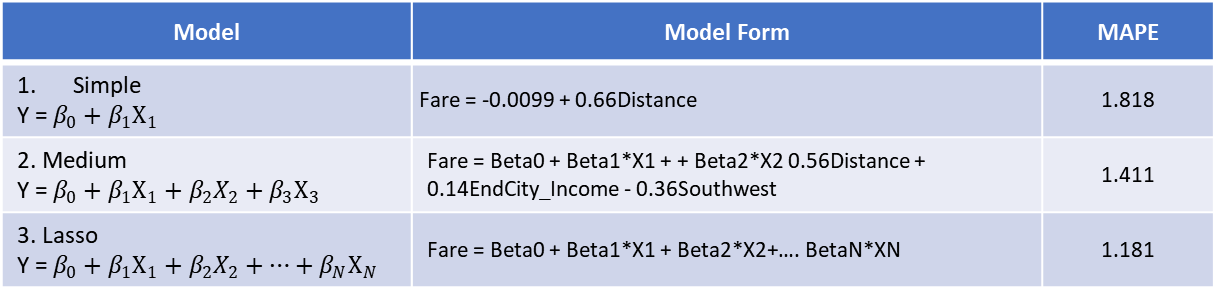